In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from yahoofinancials import YahooFinancials
import GetOldTweets3 as got
from datetime import timedelta, date

In [3]:
#data on BTC Prices
yahoo_financials = YahooFinancials('BTC-USD')

btc_prices = yahoo_financials.get_historical_price_data(start_date = '2016-01-03',
                                                        end_date = '2020-08-30',
                                                        time_interval = 'weekly')

In [4]:
btc_df = pd.DataFrame(btc_prices['BTC-USD']['prices'])
btc_df = btc_df.drop('date',axis=1)

In [5]:
btc_df.head()

,high,low,open,close,volume,adjclose,formatted_date
0,458.765991,424.705994,433.578003,458.048004,234238600,458.048004,2016-01-01
1,462.933990,424.442993,457.537994,430.306000,499157400,430.306000,2016-01-08
2,430.255005,354.914001,430.255005,410.261993,610304308,410.261993,2016-01-15
3,410.410004,375.282013,409.751007,380.289001,426500500,380.289001,2016-01-22
4,391.608002,365.451996,380.108002,389.593994,361558300,389.593994,2016-01-29


In [6]:
#add Google Search data
googleSearch = pd.read_csv('googleSearch.csv')

In [7]:
googleSearch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      244 non-null    object
 1   Searches  244 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.9+ KB


In [8]:
data = pd.DataFrame()
data['Date']= googleSearch['Date']
data['googleSearches']=googleSearch['Searches']
data['BTCPrice'] = btc_df['adjclose']

In [9]:
data.head()

,Date,googleSearches,BTCPrice
0,2016-01-03,3,458.048004
1,2016-01-10,3,430.306000
2,2016-01-17,3,410.261993
3,2016-01-24,3,380.289001
4,2016-01-31,3,389.593994


In [10]:
data.loc[data['BTCPrice'].idxmax]

Date              2017-12-03
googleSearches            84
BTCPrice             17899.7
Name: 100, dtype: object

In [11]:
data['BTCPrice']=data['BTCPrice']/17899.7

In [12]:
data.loc[data['googleSearches'].idxmax]

Date              2019-09-01
googleSearches           100
BTCPrice            0.590822
Name: 191, dtype: object

In [13]:
data['googleSearches'] = data['googleSearches']/100

In [14]:
data.set_index('Date')

,googleSearches,BTCPrice
Date,,
2016-01-03,0.03,0.025590
2016-01-10,0.03,0.024040
2016-01-17,0.03,0.022920
2016-01-24,0.03,0.021246
2016-01-31,0.03,0.021765
...,...,...
2020-08-02,0.16,0.658099
2020-08-09,0.14,0.658343
2020-08-16,0.13,0.663607


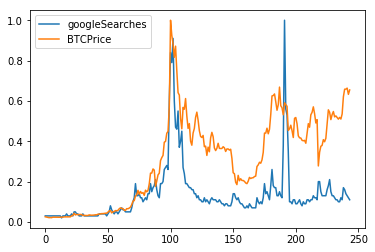

In [15]:
data.plot()

In [16]:
data['BTCPrice'].corr(data['googleSearches'])

0.6495099825219947

In [17]:
#in trading, a coefficient of more than -0.8 or 
#less than 0.8 is not considered significant.
#https://www.daytrading.com/correlation

In [76]:
data['BTCReturns']=data['BTCPrice'].pct_change()
data['googleReturns']=data['googleSearches'].pct_change()
data['BTCReturnsLog']=np.log(data['BTCReturns'])
data['googleReturnsLog']=np.log(abs(data['googleReturns']))

/Users/nicolasanguita/miniconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/nicolasanguita/miniconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


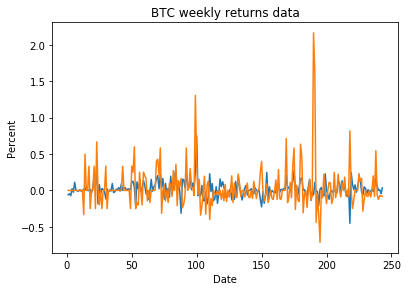

In [19]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(data['BTCReturns'])
ax1.plot(data['googleReturns'])
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("BTC weekly returns data")
plt.show()

ValueError: autodetected range of [-inf, 0.7731898882334819] is not finite

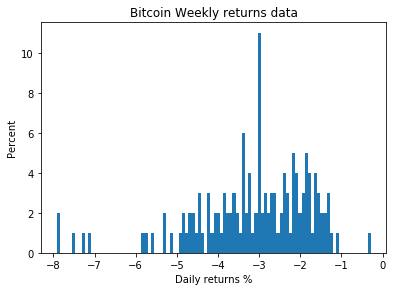

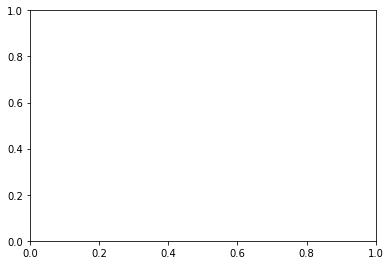

In [20]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
data['BTCReturnsLog'].plot.hist(bins = 100)
ax1.set_xlabel("Daily returns %")
ax1.set_ylabel("Percent")
ax1.set_title("Bitcoin Weekly returns data")

fig2 = plt.figure()
ax1 = fig2.add_axes([0.1,0.1,0.8,0.8])
data['googleReturnsLog'].plot.hist(bins = 100)
ax1.set_xlabel("Daily returns %")
ax1.set_ylabel("Percent")
ax1.set_title("%Change in google Searches data")
plt.show()

In [ ]:
data['BTCReturns'].corr(data['googleReturns'])

In [21]:
tweets_df = pd.read_csv('tweets.csv')

In [22]:
tweets_df.head()

,Unnamed: 0,2016-01-01,2016-01-08,2016-01-15,2016-01-22,2016-01-29,2016-02-05,2016-02-12,2016-02-19,2016-02-26,...,2020-06-26,2020-07-03,2020-07-10,2020-07-17,2020-07-24,2020-07-31,2020-08-07,2020-08-14,2020-08-21,2020-08-28
0,0,The latest Bitcoin Price Index is 459.07 USD h...,I just recieved a Bitcoin transaction. Wait wh...,Know more about Provably Fair gaming here: htt...,The latest Bitcoin Price Index is 379.42 USD h...,The latest Bitcoin Price Index is 388.55 USD h...,The latest Bitcoin Price Index is 377.67 USD h...,"Techstars 2016 Boulder class has dating, genea...","@brian_armstrong You guys proved me wrong, sin...",The latest Bitcoin Price Index is 419.45 USD h...,...,"About to move onto ""whats next in Bitcoin?"" Co...",Bitcoin traders &gt; Wall Street Hedge Fund tr...,#bitcoin Daily OBV,What if ethereum is the real bitcoin?,#Bitcoin #Crypto #Giveaway WINNER GETS $50 IN...,I was irresponsibly long bitcoin when I didn’t...,"David Portnoy Says Bitcoin Is Going To ""12,000...",Drinks in Quarantine #20 Bitcoin Bull Market N...,Robert Breedlove is the philosopher king #Bitc...,#Bitcoin #Giveaway Enter: Like &amp; RT + Tag...
1,1,Litecoin Video: Max Keiser talks about Bitcoin...,The latest Bitcoin Price Index is 429.66 USD h...,The latest Bitcoin Price Index is 409.94 USD h...,#espn #SportsCenter #nfl Bitcoin poker usa wel...,The first day I learned about #bitcoin was the...,A hard fork of #bitcoin is not contentious by ...,The latest Bitcoin Price Index is 421.58 USD h...,The latest Bitcoin Price Index is 423.51 USD h...,B2B billing is an important (often overlooked)...,...,"staring deep into my bowl of lucky charms, thi...",I wonder if everybody in #crypto realises what...,We've been giving away a lot of bitcoin today....,Are #BTC influencers like @peterktodd misleadi...,My family and friends haven't asked me how bit...,"Most ETH fans joined in 2017, so they have lit...",Yo bro @stoolpresidente when can I use my Bitc...,It's cool to see crypto people excited about Y...,Knocked down a pair of silos today Like bitcoi...,"Bitcoin Cash dropped nearly 14% today, but you..."
2,2,“Bitstamp Opens Gold Buying Service to Europea...,Bitcoin in Crisis. https://medium.com/@octskyw...,I just followed @ericgrill's #Bitcoin &amp; #B...,#iran #iraq #kuwait #UAE #sports Bitcoin poker...,Just ordered Mastering Bitcoin by Andreas M. A...,Amazing how the DOA Merch Mart Bitcoin box has...,Bitcoin Startup Bridge21 Joins 2016 Techstars ...,Why there is no Blockchain without Bitcoin in ...,7pm PST Friday night. Check out this diva's #b...,...,me: what's up husband: i just got done pretend...,Nft $ENJ,Are you sick and tired of waiting for #Bitcoin...,The Ex CEO of Nissan car company paid this for...,"When I buy #Bitcoin, I am Cancelling your Abil...",Bitcoin: run the numbers and do the math. Ethe...,"Hey, @stoolpresidente... instead of wasting yo...",Wolf of All Streets with Didi Taihuttu is live...,"Great tweet @CryptoBrag Good news, ATH today f...",Guys you were all complaining for those weeks ...
3,3,Rushing home to buy more #Potcoin while the pr...,Bitcoin does not look set to replace tradition...,"Jamie Dimon: Bitcoin “Worthless"" - #bitcoin: ""...",How China’s Plans to Launch Its Own Currency M...,NEXTBOND: bitcoin arbitrage asset. Read: http:...,2016-02-10: I qualified as an expert witness o...,Got #bitcoin? Want #ArtByte? Trade BTC/ABY her...,Jaxx: Bitcoin and Ethereum together in your po...,Iceland's Genesis launches first bitcoin minin...,...,.@danheld is good for #Bitcoin.,Nasdaq FOMO Meets Crypto: This Bitcoin ‘IPO’ C...,I’ve been giving out #Bitcoin all day long. An...,Carlos Ghosn sent $500K in Bitcoin to a father...,FearRaiser's main channel got hacked by a BitC...,Kydland and Prescott won a Nobel in Economics ...,No one has ever lost money buying bitcoin. The...,"""The dollar is highly correlated on an inverse...",Bulltrends seems easy but they are so complica...,#Bitcoin #Crypto #Giveaway WINNER GETS $25 IN...
4,4,This is going 

In [23]:
#sentiment analysis of tweets using vader
sentiment_df = pd.DataFrame()

In [42]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)['compound']
    return(score)

In [53]:

a=[x for x in tweets_df[str(start_date)]]
print(0)

0


In [54]:
start_date = date(2016,1,1)
end_date = date(2020,8,30)
delta = timedelta(days=7)

while start_date <= end_date:
    a = [x for x in tweets_df[str(start_date)]]
    sentiment_df[start_date]=[sentiment_analyzer_scores(k) for k in a]
    start_date+=delta

In [55]:
sentiment_df.head()

,2016-01-01,2016-01-08,2016-01-15,2016-01-22,2016-01-29,2016-02-05,2016-02-12,2016-02-19,2016-02-26,2016-03-04,...,2020-06-26,2020-07-03,2020-07-10,2020-07-17,2020-07-24,2020-07-31,2020-08-07,2020-08-14,2020-08-21,2020-08-28
0,0.0000,-0.8946,0.3744,0.0000,0.0000,0.0000,0.0000,-0.892,0.0000,0.0000,...,0.4314,-0.6088,0.0000,0.0000,0.9405,0.0000,0.0000,0.0000,0.7096,0.8519
1,0.0000,0.0000,0.0000,0.4588,0.0000,0.1250,0.0000,0.000,0.1779,0.2869,...,0.1027,0.8176,0.6486,-0.3818,0.3612,0.0000,0.0000,0.3919,0.6908,0.0000
2,0.0000,-0.6249,0.0000,0.6523,0.0000,-0.0601,0.0000,-0.296,0.0000,0.8402,...,-0.8793,0.0000,-0.8670,0.5187,0.1280,0.5106,-0.8016,0.6696,0.8979,-0.9020
3,-0.4101,0.0000,0.0000,0.0000,0.3612,-0.5267,0.2120,0.000,0.0000,0.2263,...,0.4404,0.0000,0.3400,0.0772,0.0000,0.2732,-0.7351,0.4939,0.2382,0.9405
4,0.6696,0.0000,0.5106,0.2732,0.0000,-0.4767,0.4019,0.000,0.3400,0.0516,...,0.0000,-0.6497,0.6696,0.6124,0.3753,0.7627,0.0000,-0.3384,0.0000,-0.3595


In [57]:
sentiment_df[date(2016,1,1)].mean()

0.073302

In [65]:
sentiment_means = []
start_date = date(2016,1,1)
end_date = date(2020,8,30)
delta = timedelta(days=7)
while start_date <= end_date:
    sentiment_means.append(sentiment_df[start_date].mean())
    start_date+=delta

In [68]:
data['twitterSentiment']=sentiment_means
data['twitterSentimentReturns']=data['twitterSentiment'].pct_change()

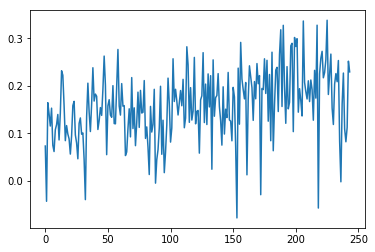

In [71]:
data['twitterSentiment'].plot()

In [73]:
data['twitterSentimentReturns'].min()

-88.3329729729725

Text(0.5, 1.0, '%Change weekly in T. sentiment')

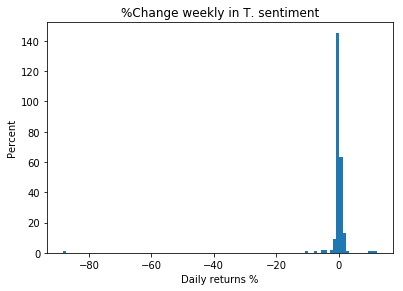

In [74]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
data['twitterSentimentReturns'].plot.hist(bins = 100)
ax1.set_xlabel("Daily returns %")
ax1.set_ylabel("Percent")
ax1.set_title("%Change weekly in T. sentiment")

In [75]:
data.head()

,Date,googleSearches,BTCPrice,BTCReturns,googleReturns,BTCReturnsLog,googleReturnsLog,twitterSentiment,twitterSentimentReturns
0,2016-01-03,0.03,0.025590,NaN,NaN,NaN,NaN,0.073302,NaN
1,2016-01-10,0.03,0.024040,-0.060566,0.0,NaN,-inf,-0.042822,-1.584186
2,2016-01-17,0.03,0.022920,-0.046581,0.0,NaN,-inf,0.164422,-4.839662
3,2016-01-24,0.03,0.021246,-0.073058,0.0,NaN,-inf,0.141164,-0.141453
4,2016-01-31,0.03,0.021765,0.024468,0.0,-3.71038,-inf,0.115374,-0.182695


In [82]:
data=data.set_index('Date')

In [80]:
data=data.drop(['BTCReturnsLog','googleReturnsLog'],axis=1)

In [83]:
data.head()

,googleSearches,BTCPrice,BTCReturns,googleReturns,twitterSentiment,twitterSentimentReturns
Date,,,,,,
2016-01-03,0.03,0.025590,NaN,NaN,0.073302,NaN
2016-01-10,0.03,0.024040,-0.060566,0.0,-0.042822,-1.584186
2016-01-17,0.03,0.022920,-0.046581,0.0,0.164422,-4.839662
2016-01-24,0.03,0.021246,-0.073058,0.0,0.141164,-0.141453
2016-01-31,0.03,0.021765,0.024468,0.0,0.115374,-0.182695


In [84]:
data.to_csv('final_data.csv')

In [165]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2)

In [126]:
train.tail()

,googleSearches,BTCPrice,BTCReturns,googleReturns,twitterSentiment,twitterSentimentReturns
Date,,,,,,
2019-05-26,0.15,0.464783,0.055523,0.071429,0.253486,0.378945
2020-05-17,0.15,0.507369,-0.066980,-0.285714,0.266562,0.191893
2016-12-25,0.05,0.054386,0.126029,0.250000,0.170720,0.080219
2016-06-19,0.05,0.034860,-0.185736,0.000000,0.096714,-0.421678
2020-03-15,0.20,0.345882,0.245515,0.000000,0.225206,-4.948904


In [124]:
train.tail()

,googleSearches,googleReturns,twitterSentiment,twitterSentimentReturns
Date,,,,
2019-07-14,0.17,0.000000,0.232822,0.466004
2018-11-18,0.14,0.400000,0.196616,1.331950
2016-10-30,0.04,0.333333,0.126880,0.173576
2020-04-05,0.13,0.000000,0.216758,-0.204090
2019-07-07,0.17,-0.055556,0.158814,1.504400


In [166]:
prices = train['BTCPrice']
train = train.drop(['BTCPrice','BTCReturns'],axis=1)

,googleSearches,googleReturns,twitterSentiment,twitterSentimentReturns
Date,,,,
2016-04-24,0.03,0.000000,0.084620,-0.466900
2016-01-31,0.03,0.000000,0.115374,-0.182695
2019-02-10,0.07,-0.125000,0.170734,12.315707
2016-01-10,0.03,0.000000,-0.042822,-1.584186
2016-02-28,0.03,0.000000,0.107518,0.741239
...,...,...,...,...
2019-05-26,0.15,0.071429,0.253486,0.378945
2020-05-17,0.15,-0.285714,0.266562,0.191893
2016-12-25,0.05,0.250000,0.170720,0.080219


In [139]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, 2016-04-24 to 2020-03-15
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   googleSearches           195 non-null    float64
 1   googleReturns            194 non-null    float64
 2   twitterSentiment         195 non-null    float64
 3   twitterSentimentReturns  194 non-null    float64
dtypes: float64(4)
memory usage: 12.6+ KB


In [167]:
train=train.drop('twitterSentimentReturns',axis=1)

In [168]:
train=train.drop('googleReturns',axis=1)

In [161]:
train.isnull().sum()

googleSearches      0
twitterSentiment    0
dtype: int64

In [162]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)

In [169]:
clf.fit(train,prices)

ValueError: Unknown label type: 'continuous'